<a href="https://colab.research.google.com/github/casjunior93/Desafio-Regressao---Tera/blob/master/Desafio_Regress%C3%A3o_Tera_Refeito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando acesso do Colab ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bibliotecas fundamentais

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.

# 1 Abordar o problema e analisar o panorama em geral

Como mostra o excelente artigo [Precificação do imóvel através de estudo comparativo de mercado](https://remaxrs.com.br/blog/precificacao-do-imovel-atraves-de-estudo-comparativo-de-mercado-re-max/), definir o preço correto para a venda de um imóvel é muito importante, para evitar que se perca dinhero na venda de um imóvel ou que este seja supervalorizado, impedindo a venda. Por isso é importante atentar-se no processo de precificação, que envolve um conjunto de critérios como método, tempo e análise.

Como conhecimento de um expert da área de venda de imóveis, vou utilizar o artigo citado anteriormente para encontrar os principais atributos que influenciam na precificação de um imóvel. No artigo, encontramos que estes fatores são importantes:

* Localização
* Terreno
* Vizinhança
* Tipo de construção
* Idade
* Infraestrutura
* Segurança
* Acabamento
* Estado de conservação

Cabe analisar se os dados na base utilizada englobam os fatores de precificação apresentados.

# 2 Obter os dados

Dados: [Link](https://raw.githubusercontent.com/casjunior93/Desafio-Regressao---Tera/master/dados/base.csv)

Dicionário: [link](https://github.com/casjunior93/Desafio-Regressao---Tera/raw/master/dados/Dicion%C3%A1rio%20de%20dados.pdf)

## 2.1 Listar os dados necessários

Utilizando os fatores que influenciam na precificação, levantados no passo 1, torna-se necessário analisar se a base de dados que temos contém dados sobre estes fatores. Para esta análise, vou utilizar o dicionário dos dados fornecido no passo 2 para analisar os atributos que temos.

### 2.1.1 Atributos de **Localização**

*  `ClasseZona` - A classificação geral de zoneamento
*  `Rua` - Tipo de acesso rua
*  `Beco` - Tipo de acesso beco
*  `Bairro` - Locais dentro dos limites da cidade de Ames
*  `Estrada1` - Proximidade com estrada principal ou ferroviária
*  `Estrada2` - Proximidade de estrada principal ou ferroviária (se um segundo estiver presente)


### 2.1.2 Terreno

*  `TamanhoLote` - Tamanho do lote em pés quadrados
*  `FormaProp` - Forma geral da propriedade
*  `PlanoProp` - Planicidade da propriedade
*  `ConfigLote` - Configuração Lote
*  `InclinacaoLote` - Inclinação da propriedade

### 2.1.3 Vizinhança

Sem dados relacionados.

### 2.1.4 Tipo de construção

*  `TipoAlvenaria` - Tipo Alvenaria
*  `AreaAlvenaria` - Área Alvenaria
*  `TipoFundacao` - Tipo de fundação

### 2.1.5 Idade

*  `AnoConstrucao` - Data de construção original
*  `AnoReforma` - Data da reforma

### 2.1.6 Infraestrutura

*  `TipoHabitacao` - Tipo de habitação
*  `EstiloHabitacao` - Estilo de habitação
*  `TipoTelhado` - Tipo de telhado
*  `InstalacaoEletrica` - Instalação elétrica
*  `AreaTerreo` - Área Térreo (pés quadrados)
*  `AreaConstruida` - Área construída
*  `Banheiro` - Banheiros térreo e acima
*  `Cozinha` - Número de cozinhas
*  `TotalQuartos` - Total de quartos (térreo e acima)
*  `CarrosGaragem` - Tamanho da garagem em capacidade de carros
*  `AreaPiscina` - Área da piscina em pés quadrados
*  `AreaDeck` - Área de deck de madeira em pés quadrados
*  `AreaVarandaAberta` - Área de varanda aberta em pés quadrados
*  `AreaVarandaFechada` - Área de varanda fechada em pés quadrados
*  `AreaAlpendre` - Área de alpendre em pés quadrados

### 2.1.7 Segurança

*  `QualidadeCerca` - Qualidade da cerca

### 2.1.8 Acabamento

*  `MaterialTelhado` - Material do telhado
*  `Qualidade` - Material geral e qualidade de acabamento
*  `Exterior1`  - Cobertura externa do imóvel
*  `Exterior2` - Cobertura externa do imóvel (se mais de um material)
*  `QualidadePiscina` - Qualidade Piscina
*  `QualidadeGaragem` - Qualidade Garagem
*  `QualidadeCobertura` - Qualidade cobertura
*  `CondicaoExterna` - Condição atual do material na parte externa
*  `QualidadeCozinha` -  Qualidade da cozinha

### 2.1.9 Estado de conservação

*  `Condicao` - Classificação geral condição

### 2.1.10 - Variável alvo

*  `PrecoVenda` - Preço de venda do imóvel

### 2.1.11 Considerações

Temos quase todos os dados que abordam os fatores apontados no tópico 1. Não encontrei dados relativos à vizinhança.

## 2.2 Carregar os dados

In [3]:
%%time
df_original = pd.read_csv('https://raw.githubusercontent.com/casjunior93/Desafio-Regressao---Tera/master/dados/base.csv')

CPU times: user 20.4 ms, sys: 8.48 ms, total: 28.9 ms
Wall time: 305 ms


## 2.3 Verifique o tamanho dos dados

Ainda não foram filtrados os atributos discutidos na seção 2. Este dataset contém bem mais informações. Será necessário filtrar o dataset.

Obs: no dataset, o atributo cozinha está como 'KitchenAbvGr'.

In [4]:
df_filtrado = df_original[['ClasseZona', 'Rua', 'Beco', 'Bairro', 'Estrada1', 'Estrada2', 'TamanhoLote',
                           'FormaProp', 'PlanoProp', 'ConfigLote', 'InclinacaoLote', 'TipoAlvenaria', 'AreaAlvenaria',
                           'TipoFundacao', 'AnoConstrucao', 'AnoReforma', 'TipoHabitacao', 'EstiloHabitacao',
                           'TipoTelhado', 'InstalacaoEletrica', 'AreaTerreo', 'AreaConstruida', 'Banheiro', 'KitchenAbvGr',
                           'TotalQuartos', 'CarrosGaragem', 'AreaPiscina', 'AreaDeck', 'AreaVarandaAberta',
                           'AreaVarandaFechada', 'AreaAlpendre', 'QualidadeCerca', 'MaterialTelhado', 'Qualidade', 'Exterior1',
                           'Exterior2', 'Condicao', 'PrecoVenda', 'QualidadePiscina', 'QualidadeGaragem', 
                           'QualidadeCobertura', 'CondicaoExterna', 'QualidadeCozinha']]
df_filtrado.head()

,ClasseZona,Rua,Beco,Bairro,Estrada1,Estrada2,TamanhoLote,FormaProp,PlanoProp,ConfigLote,...,Qualidade,Exterior1,Exterior2,Condicao,PrecoVenda,QualidadePiscina,QualidadeGaragem,QualidadeCobertura,CondicaoExterna,QualidadeCozinha
0,RL,Pave,NaN,CollgCr,Norm,Norm,8450,Reg,Lvl,Inside,...,7,VinylSd,VinylSd,5,208500,NaN,TA,Gd,TA,Gd
1,RL,Pave,NaN,Veenker,Feedr,Norm,9600,Reg,Lvl,FR2,...,6,MetalSd,MetalSd,8,181500,NaN,TA,TA,TA,TA
2,RL,Pave,NaN,CollgCr,Norm,Norm,11250,IR1,Lvl,Inside,...,7,VinylSd,VinylSd,5,223500,NaN,TA,Gd,TA,Gd
3,RL,Pave,NaN,Crawfor,Norm,Norm,9550,IR1,Lvl,Corner,...,7,Wd Sdng,Wd Shng,5,140000,NaN,TA,TA,TA,Gd
4,RL,Pave,NaN,NoRidge,Norm,Norm,14260,IR1,Lvl,FR2,...,8,VinylSd,VinylSd,5,250000,NaN,TA,Gd,TA,Gd


In [5]:
print(f'Total registros df original: {df_original.shape[0]}')
print(f'Total colunas df original: {df_original.shape[1]}')
print(f'Total registros df filtrado: {df_filtrado.shape[0]}')
print(f'Total colunas df filtrado: {df_filtrado.shape[1]}')

Total registros df original: 1460
Total colunas df original: 81
Total registros df filtrado: 1460
Total colunas df filtrado: 43


## 2.4 Estrutura dos dados

### 2.4.1 Primeiros registros

In [6]:
df_filtrado.head()

,ClasseZona,Rua,Beco,Bairro,Estrada1,Estrada2,TamanhoLote,FormaProp,PlanoProp,ConfigLote,...,Qualidade,Exterior1,Exterior2,Condicao,PrecoVenda,QualidadePiscina,QualidadeGaragem,QualidadeCobertura,CondicaoExterna,QualidadeCozinha
0,RL,Pave,NaN,CollgCr,Norm,Norm,8450,Reg,Lvl,Inside,...,7,VinylSd,VinylSd,5,208500,NaN,TA,Gd,TA,Gd
1,RL,Pave,NaN,Veenker,Feedr,Norm,9600,Reg,Lvl,FR2,...,6,MetalSd,MetalSd,8,181500,NaN,TA,TA,TA,TA
2,RL,Pave,NaN,CollgCr,Norm,Norm,11250,IR1,Lvl,Inside,...,7,VinylSd,VinylSd,5,223500,NaN,TA,Gd,TA,Gd
3,RL,Pave,NaN,Crawfor,Norm,Norm,9550,IR1,Lvl,Corner,...,7,Wd Sdng,Wd Shng,5,140000,NaN,TA,TA,TA,Gd
4,RL,Pave,NaN,NoRidge,Norm,Norm,14260,IR1,Lvl,FR2,...,8,VinylSd,VinylSd,5,250000,NaN,TA,Gd,TA,Gd


### 2.4.2 Informações gerais dos dados

#### 2.4.2.1 Rápida descrição dos dados, como total de linhas, tipo dos dados e valores não nulos.

In [7]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClasseZona          1460 non-null   object 
 1   Rua                 1460 non-null   object 
 2   Beco                91 non-null     object 
 3   Bairro              1460 non-null   object 
 4   Estrada1            1460 non-null   object 
 5   Estrada2            1460 non-null   object 
 6   TamanhoLote         1460 non-null   int64  
 7   FormaProp           1460 non-null   object 
 8   PlanoProp           1460 non-null   object 
 9   ConfigLote          1460 non-null   object 
 10  InclinacaoLote      1460 non-null   object 
 11  TipoAlvenaria       1452 non-null   object 
 12  AreaAlvenaria       1452 non-null   float64
 13  TipoFundacao        1460 non-null   object 
 14  AnoConstrucao       1460 non-null   int64  
 15  AnoReforma          1460 non-null   int64  
 16  TipoHa

#### 2.4.2.2 Resumo geral dos atributos.

In [8]:
df_filtrado.iloc[:,0:10].describe(include='all')

,ClasseZona,Rua,Beco,Bairro,Estrada1,Estrada2,TamanhoLote,FormaProp,PlanoProp,ConfigLote
count,1460,1460,91,1460,1460,1460,1460.00,1460,1460,1460
unique,5,2,2,25,9,8,NaN,4,4,5
top,RL,Pave,Grvl,NAmes,Norm,Norm,NaN,Reg,Lvl,Inside
freq,1151,1454,50,225,1260,1445,NaN,925,1311,1052
mean,NaN,NaN,NaN,NaN,NaN,NaN,10516.83,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,9981.26,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1300.00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7553.50,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,9478.50,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,11601.50,NaN,NaN,NaN


In [9]:
df_filtrado.iloc[:,10:20].describe(include='all')

,InclinacaoLote,TipoAlvenaria,AreaAlvenaria,TipoFundacao,AnoConstrucao,AnoReforma,TipoHabitacao,EstiloHabitacao,TipoTelhado,InstalacaoEletrica
count,1460,1452,1452.00,1460,1460.00,1460.00,1460,1460,1460,1459
unique,3,4,NaN,6,NaN,NaN,5,8,6,5
top,Gtl,None,NaN,PConc,NaN,NaN,1Fam,1Story,Gable,SBrkr
freq,1382,864,NaN,647,NaN,NaN,1220,726,1141,1334
mean,NaN,NaN,103.69,NaN,1971.27,1984.87,NaN,NaN,NaN,NaN
std,NaN,NaN,181.07,NaN,30.20,20.65,NaN,NaN,NaN,NaN
min,NaN,NaN,0.00,NaN,1872.00,1950.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.00,NaN,1954.00,1967.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.00,NaN,1973.00,1994.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,166.00,NaN,2000.00,2004.00,NaN,NaN,NaN,NaN


In [10]:
df_filtrado.iloc[:,20:30].describe(include='all')

,AreaTerreo,AreaConstruida,Banheiro,KitchenAbvGr,TotalQuartos,CarrosGaragem,AreaPiscina,AreaDeck,AreaVarandaAberta,AreaVarandaFechada
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,1162.63,1515.46,1.57,1.05,6.52,1.77,2.76,94.24,46.66,21.95
std,386.59,525.48,0.55,0.22,1.63,0.75,40.18,125.34,66.26,61.12
min,334.00,334.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00
25%,882.00,1129.50,1.00,1.00,5.00,1.00,0.00,0.00,0.00,0.00
50%,1087.00,1464.00,2.00,1.00,6.00,2.00,0.00,0.00,25.00,0.00
75%,1391.25,1776.75,2.00,1.00,7.00,2.00,0.00,168.00,68.00,0.00
max,4692.00,5642.00,3.00,3.00,14.00,4.00,738.00,857.00,547.00,552.00


In [11]:
df_filtrado.iloc[:,30:40].describe(include='all')

,AreaAlpendre,QualidadeCerca,MaterialTelhado,Qualidade,Exterior1,Exterior2,Condicao,PrecoVenda,QualidadePiscina,QualidadeGaragem
count,1460.00,281,1460,1460.00,1460,1460,1460.00,1460.00,7,1379
unique,NaN,4,8,NaN,15,16,NaN,NaN,3,5
top,NaN,MnPrv,CompShg,NaN,VinylSd,VinylSd,NaN,NaN,Gd,TA
freq,NaN,157,1434,NaN,515,504,NaN,NaN,3,1311
mean,15.06,NaN,NaN,6.10,NaN,NaN,5.58,180921.20,NaN,NaN
std,55.76,NaN,NaN,1.38,NaN,NaN,1.11,79442.50,NaN,NaN
min,0.00,NaN,NaN,1.00,NaN,NaN,1.00,34900.00,NaN,NaN
25%,0.00,NaN,NaN,5.00,NaN,NaN,5.00,129975.00,NaN,NaN
50%,0.00,NaN,NaN,6.00,NaN,NaN,5.00,163000.00,NaN,NaN
75%,0.00,NaN,NaN,7.00,NaN,NaN,6.00,214000.00,NaN,NaN


In [12]:
df_filtrado.iloc[:,40:50].describe(include='all')

,QualidadeCobertura,CondicaoExterna,QualidadeCozinha
count,1460,1460,1460
unique,4,5,4
top,TA,TA,TA
freq,906,1282,735


#### 2.4.2.3 Histograma dos atributos numéricos

CPU times: user 790 ms, sys: 26.2 ms, total: 816 ms
Wall time: 805 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0e0522970>,
      dtype=object)

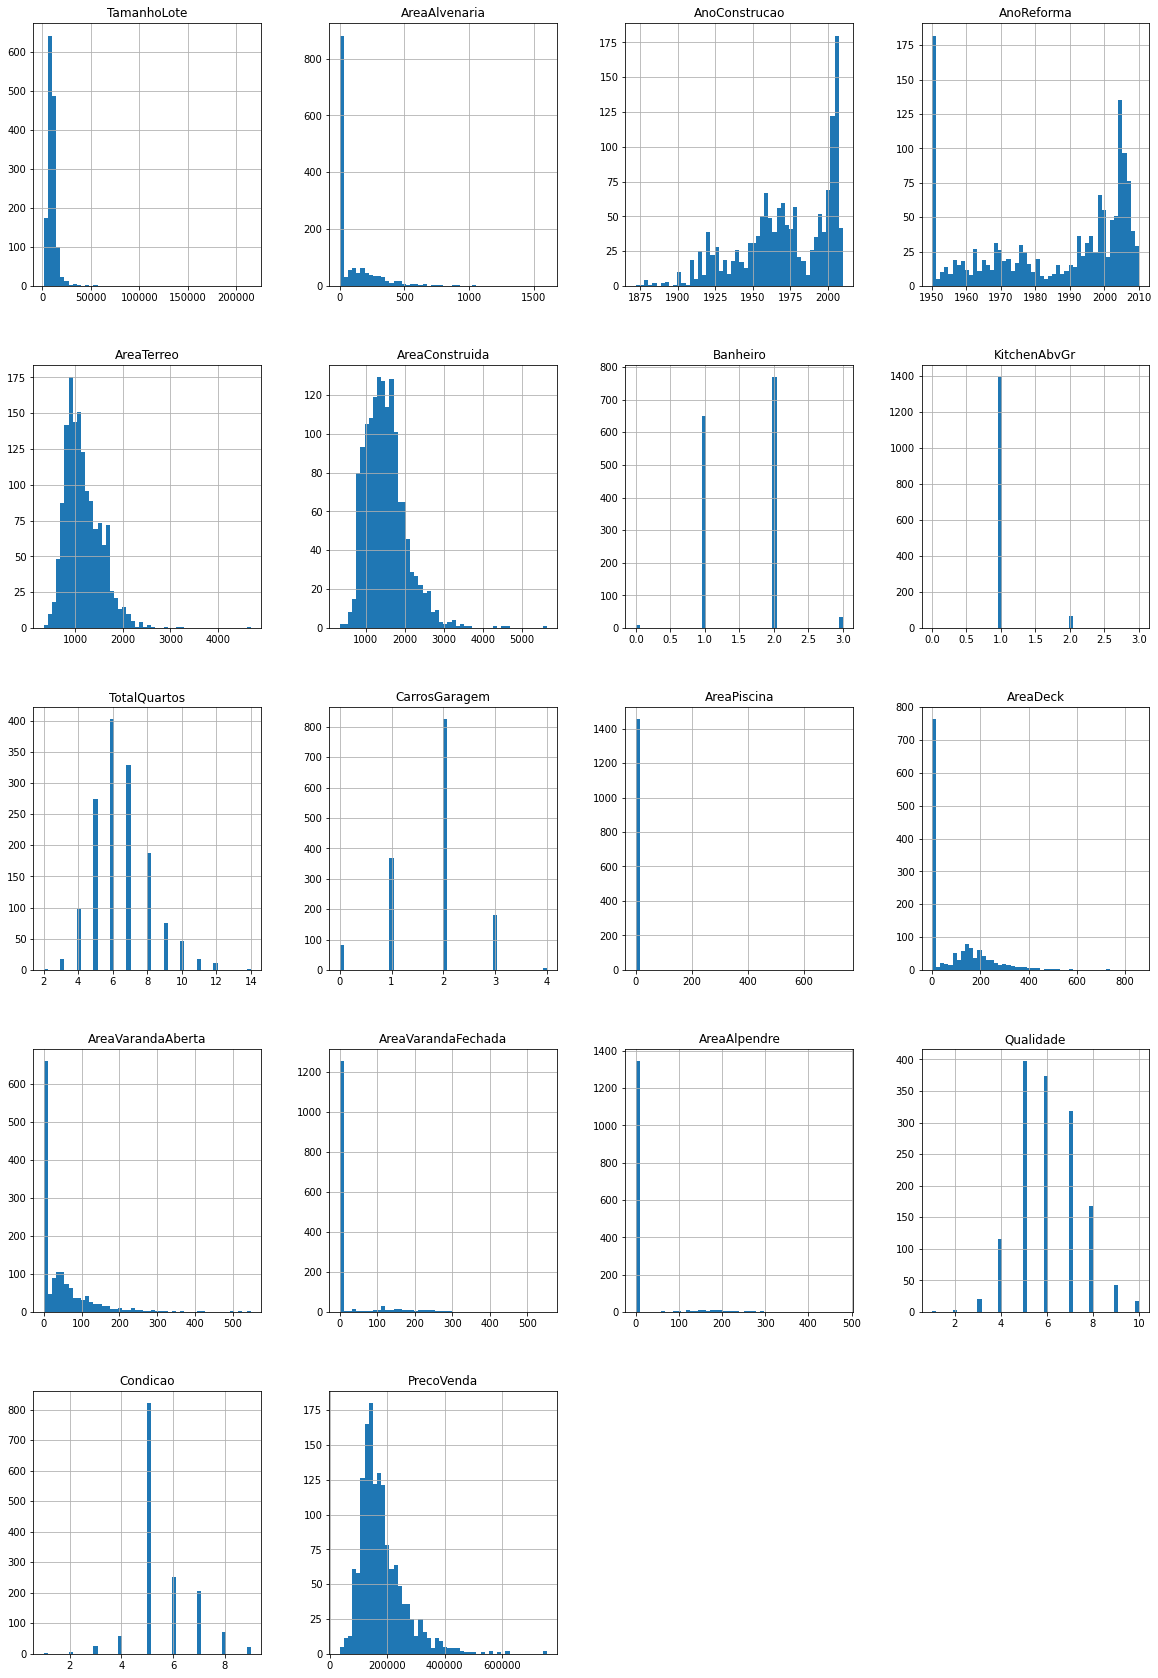

In [13]:
%%time
df_filtrado.hist(bins=50, figsize=(20,30));

## 2.3 Separando um conjunto de teste (20%)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_treino, df_teste = train_test_split(df_filtrado, test_size = 0.2, random_state=42)

In [16]:
''' msk = np.random.rand(len(df_filtrado)) < 0.20 # cria uma mascara com as posicoes
df_teste = df_filtrado[msk]
df_treino = df_filtrado[~msk] '''

' msk = np.random.rand(len(df_filtrado)) < 0.20 # cria uma mascara com as posicoes\ndf_teste = df_filtrado[msk]\ndf_treino = df_filtrado[~msk] '

In [17]:
print(f'Qtde teste: {df_teste.shape[0]}')
print(f'Qtde treino: {df_treino.shape[0]}')

Qtde teste: 292
Qtde treino: 1168


# 3 Explorar os dados para obter informações úteis

## 3.1 Buscando correlações

### 3.1.1 Gráfico de correlação geral

#### 3.1.1.1 Correlação de variáveis numéricas

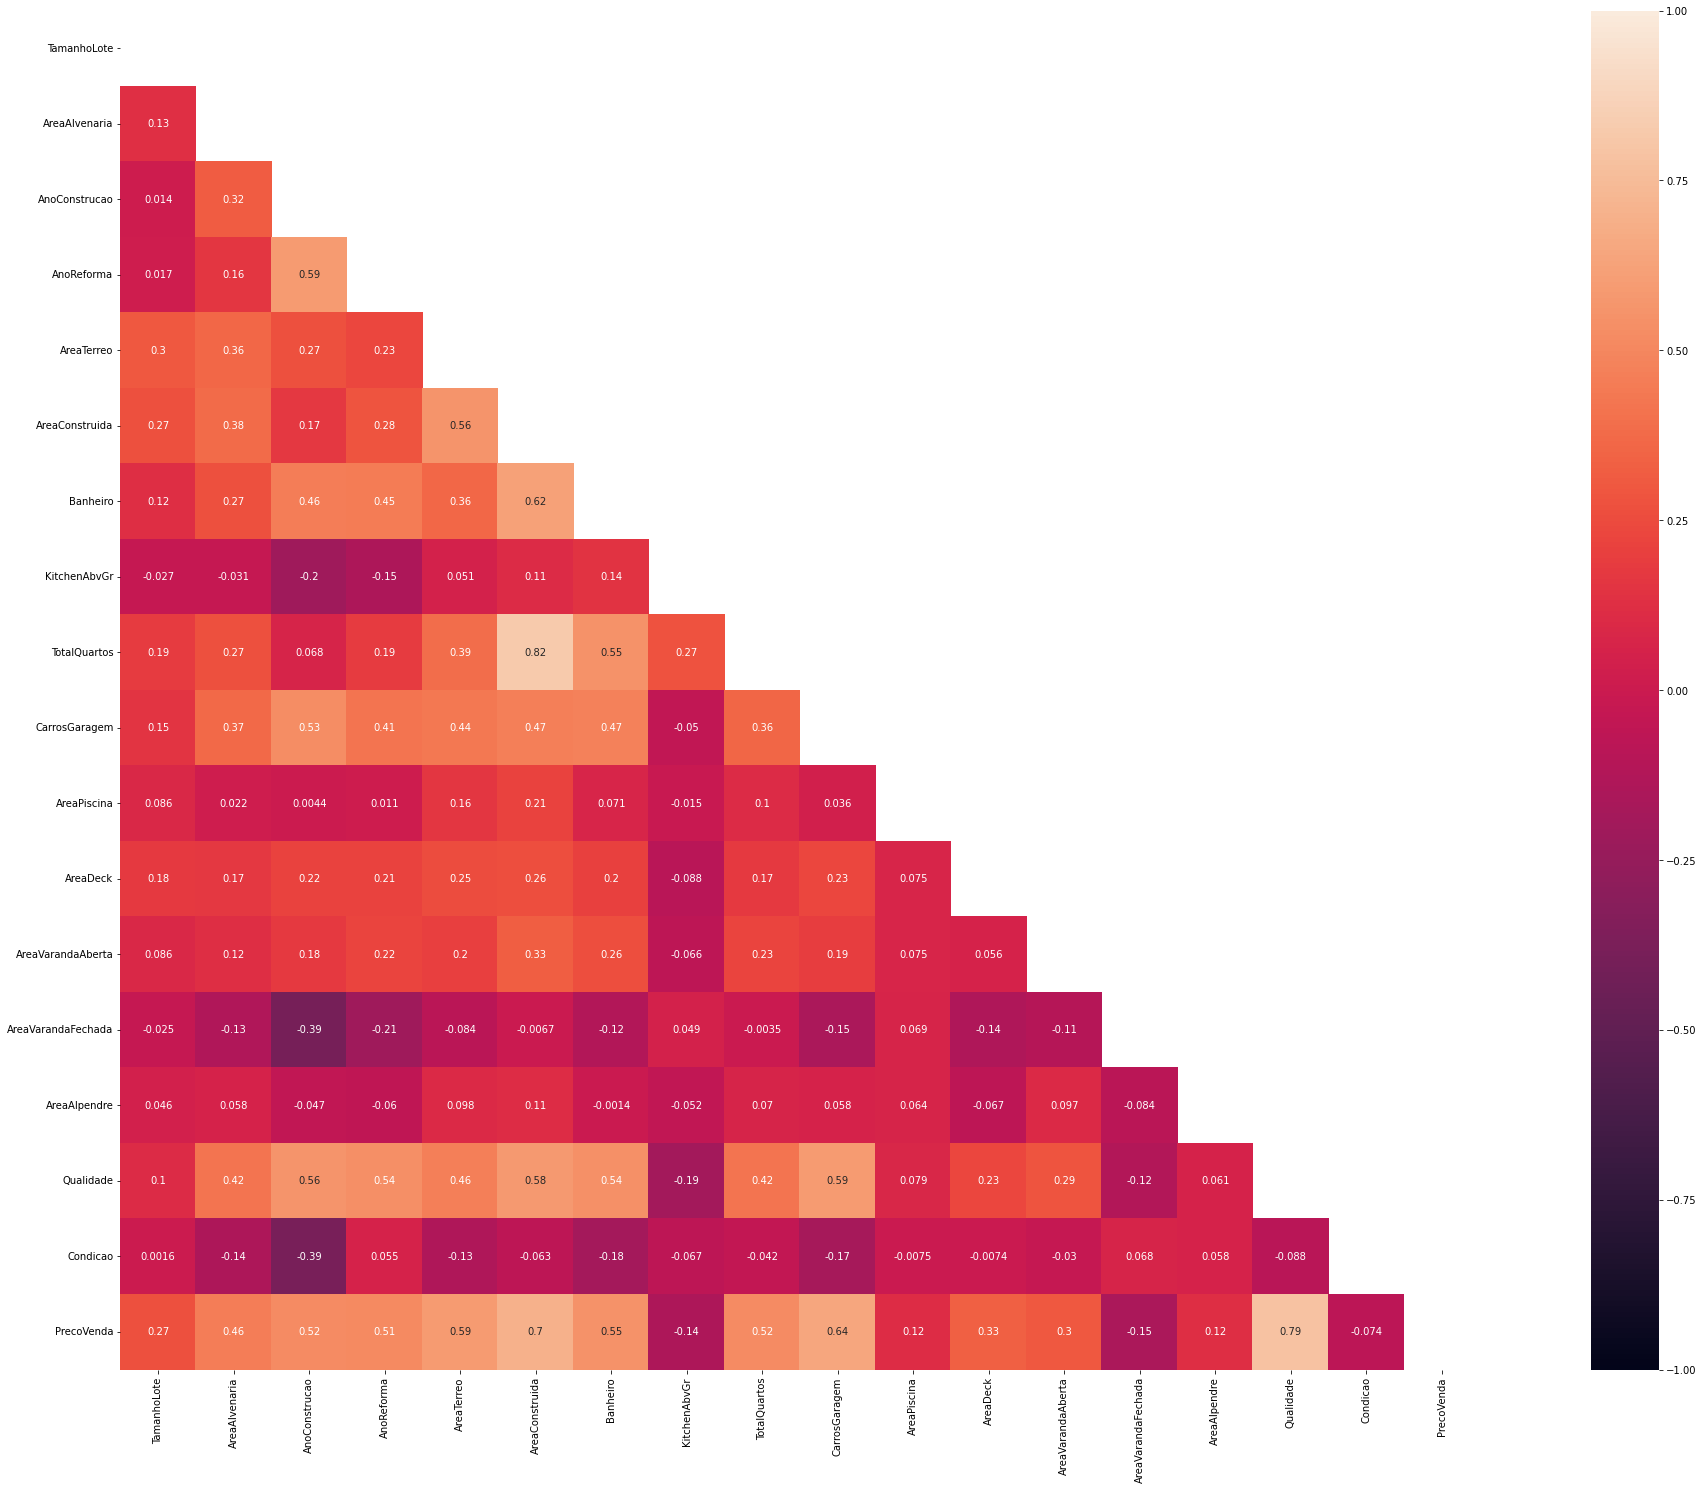

CPU times: user 1.07 s, sys: 195 ms, total: 1.27 s
Wall time: 1.14 s


In [18]:
%%time
mask = np.triu(np.ones_like(df_treino.corr(), dtype=np.bool))
plt.figure(figsize=(40,25))
sns.heatmap(df_treino.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

### 3.1.2 Considerações

*  Entre os atributos numéricos, não há uma correlação forte, exceto entre o total de quartos e a área construída. Apesar da correlação forte, achei interessante manter as duas, já que considero ambas as informações importantes para o estudo.
*  Entre os atributos e a varável alvo, temos correlações positivas relativamente fortes entre a variável alvo e as seguintes: Qualidade, CarrosGaragem, TotalQuartos, Banheiro, AreaConstruida, AreaTerreo, AnoReforma, AnoConstrucao e AreaAlvenaria

### 3.1.3 Visualizando correlações

#### 3.1.3.1 Correlação com a variável alvo

In [19]:
matriz_corr = df_treino.corr()
matriz_corr['PrecoVenda'].sort_values(ascending=False)

PrecoVenda            1.00
Qualidade             0.79
AreaConstruida        0.70
CarrosGaragem         0.64
AreaTerreo            0.59
Banheiro              0.55
TotalQuartos          0.52
AnoConstrucao         0.52
AnoReforma            0.51
AreaAlvenaria         0.46
AreaDeck              0.33
AreaVarandaAberta     0.30
TamanhoLote           0.27
AreaAlpendre          0.12
AreaPiscina           0.12
Condicao             -0.07
KitchenAbvGr         -0.14
AreaVarandaFechada   -0.15
Name: PrecoVenda, dtype: float64

#### 3.1.3.2 Visualizando as correlações

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
atributos = ['PrecoVenda', 'Qualidade', 'CarrosGaragem', 'AreaConstruida', 'AreaTerreo', 'Banheiro',
             'TotalQuartos', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria']

CPU times: user 2.85 s, sys: 38.6 ms, total: 2.89 s
Wall time: 2.91 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0da7b0a00>,
      dtype=object)

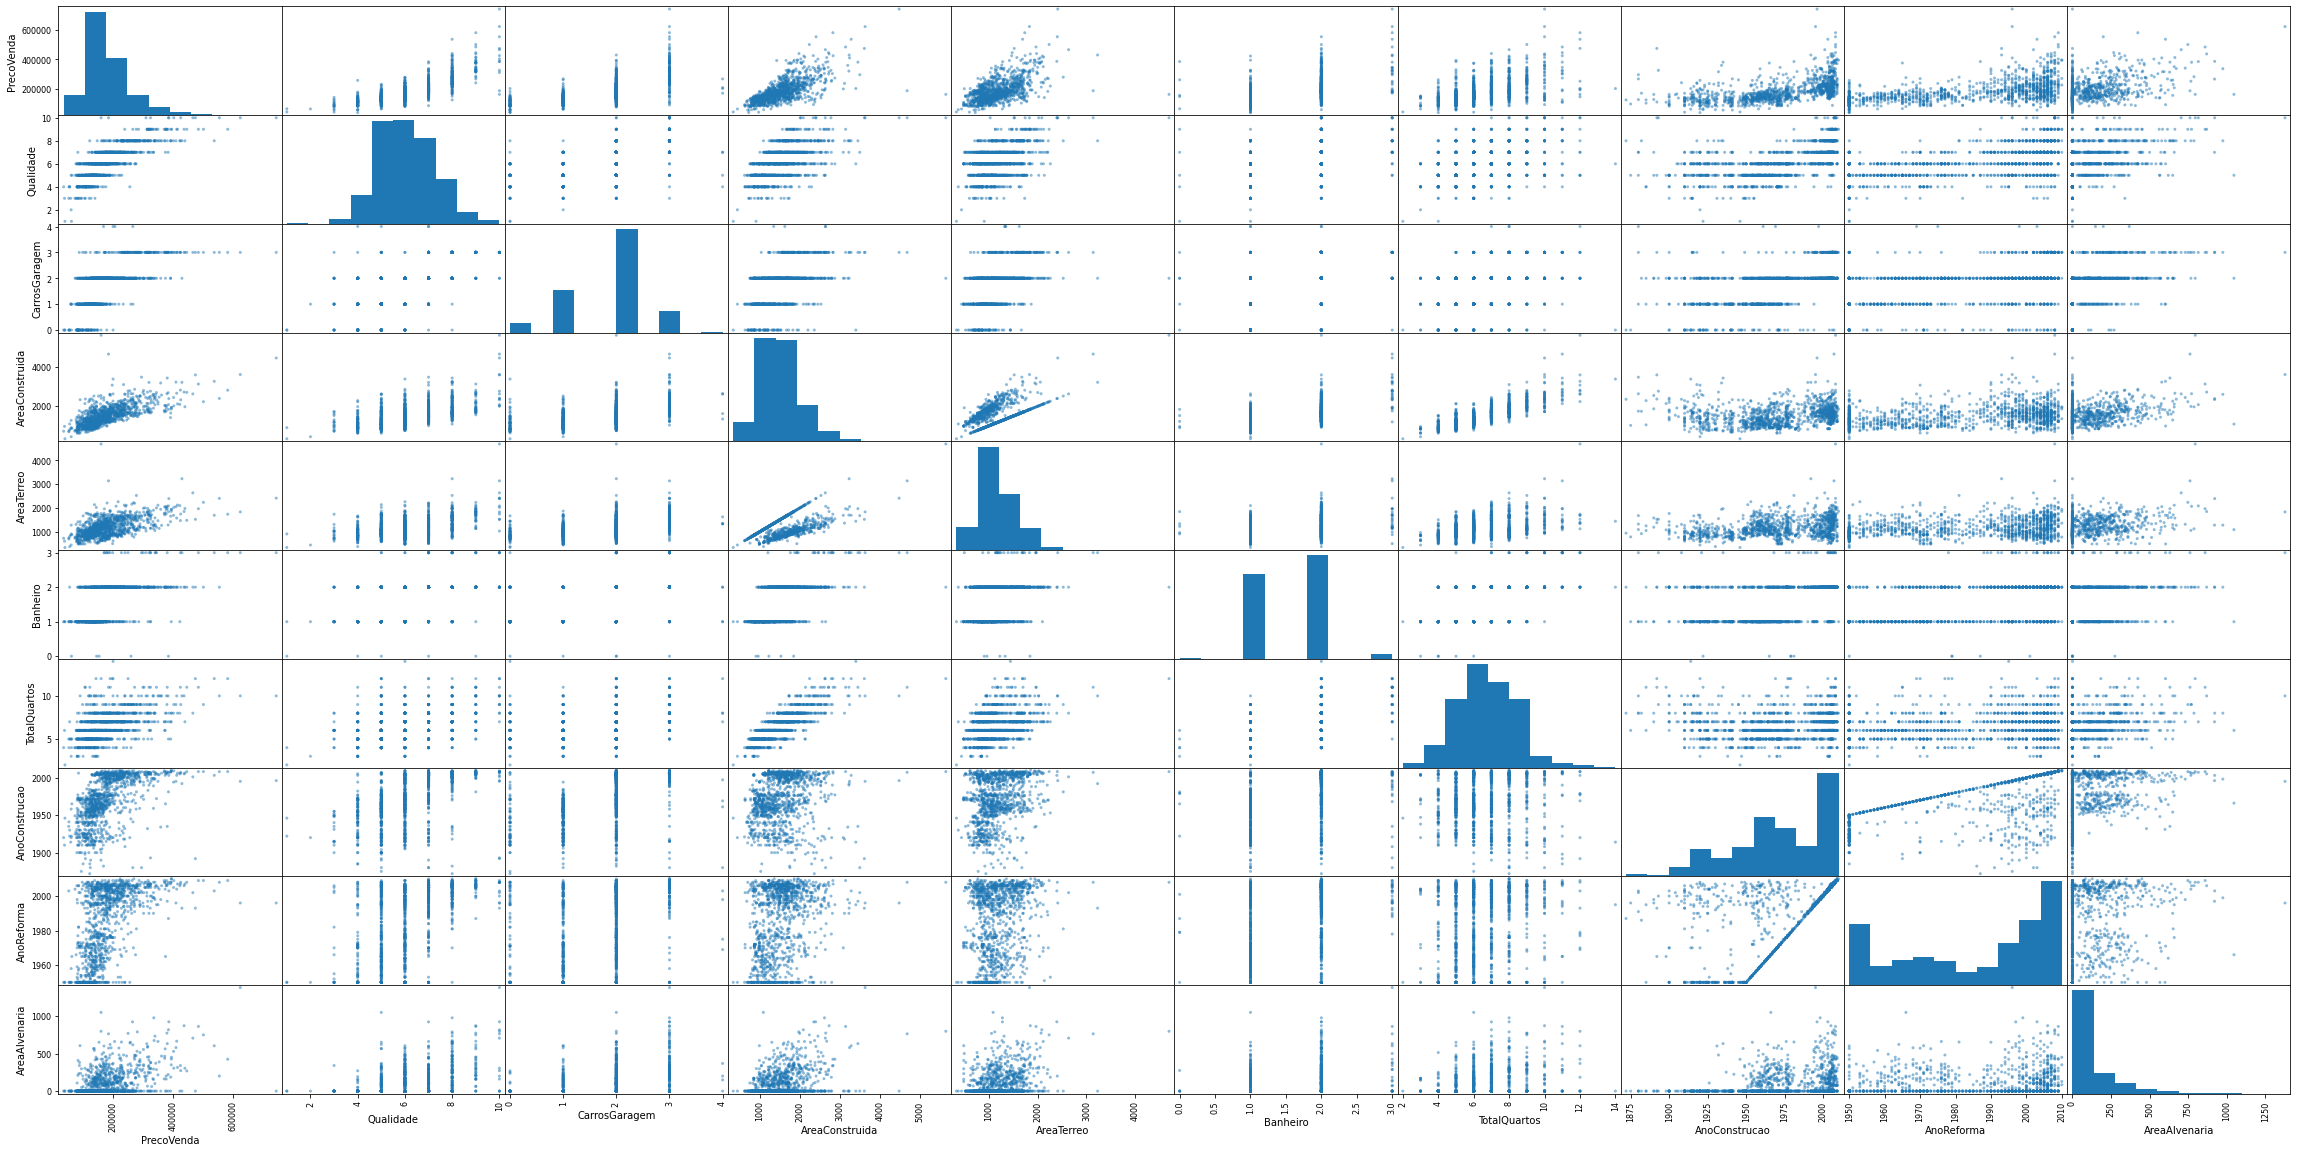

In [22]:
%%time
scatter_matrix(df_treino[atributos], figsize = (40,20));

#### 3.1.3.3 Considerações

*  Uma linha reta horizontal no gráfico de AnoReforma x PrecoVenda sugere uma limitação dos dados de reforma. De fato, no tópico 2.4.2.2, vemos na descrição da tabela AnoReforma que o valor mínimo é 1950.
*  O atributo mais promissor para prever o preço de venda é `Qualidade`. Considerando que `Qualidade` seja um atributo categórico (não há notas intermediárias entre os inteiros), o atributo numérico mais promissor para a previsão de preço de venda é `AreaConstruida`.

# 4 Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina

## 4.1 Limpando dados

### 4.1.1 Verificando os dados ausentes

In [23]:
df_treino2 = df_treino.copy()

In [24]:
df_treino2.isnull().sum()

ClasseZona               0
Rua                      0
Beco                  1094
Bairro                   0
Estrada1                 0
Estrada2                 0
TamanhoLote              0
FormaProp                0
PlanoProp                0
ConfigLote               0
InclinacaoLote           0
TipoAlvenaria            6
AreaAlvenaria            6
TipoFundacao             0
AnoConstrucao            0
AnoReforma               0
TipoHabitacao            0
EstiloHabitacao          0
TipoTelhado              0
InstalacaoEletrica       1
AreaTerreo               0
AreaConstruida           0
Banheiro                 0
KitchenAbvGr             0
TotalQuartos             0
CarrosGaragem            0
AreaPiscina              0
AreaDeck                 0
AreaVarandaAberta        0
AreaVarandaFechada       0
AreaAlpendre             0
QualidadeCerca         935
MaterialTelhado          0
Qualidade                0
Exterior1                0
Exterior2                0
Condicao                 0
P

#### 4.1.1.1 Considerações

Os atributos Beco e QualidadeCerca tem um proporção muito grande de dados ausentes. Vou excluí-los.

In [25]:
del df_treino2['Beco']
del df_treino2['QualidadeCerca']

Criando um transformador para aplicar essa esclusão de colunas em pipelines

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

In [27]:
class dropColunas(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [28]:
df_treino2.isnull().sum()

ClasseZona               0
Rua                      0
Bairro                   0
Estrada1                 0
Estrada2                 0
TamanhoLote              0
FormaProp                0
PlanoProp                0
ConfigLote               0
InclinacaoLote           0
TipoAlvenaria            6
AreaAlvenaria            6
TipoFundacao             0
AnoConstrucao            0
AnoReforma               0
TipoHabitacao            0
EstiloHabitacao          0
TipoTelhado              0
InstalacaoEletrica       1
AreaTerreo               0
AreaConstruida           0
Banheiro                 0
KitchenAbvGr             0
TotalQuartos             0
CarrosGaragem            0
AreaPiscina              0
AreaDeck                 0
AreaVarandaAberta        0
AreaVarandaFechada       0
AreaAlpendre             0
MaterialTelhado          0
Qualidade                0
Exterior1                0
Exterior2                0
Condicao                 0
PrecoVenda               0
QualidadePiscina      1162
Q

Como existem poucos dados faltantes, e há variáveis numéricas e categóricas, vou substituir valores ausentes pelo valor mais frequente em suas colunas.

In [29]:
df_treino_limpo = df_treino2.fillna(df_treino.mode().iloc[0])

In [30]:
df_treino_limpo.isnull().sum()

ClasseZona            0
Rua                   0
Bairro                0
Estrada1              0
Estrada2              0
TamanhoLote           0
FormaProp             0
PlanoProp             0
ConfigLote            0
InclinacaoLote        0
TipoAlvenaria         0
AreaAlvenaria         0
TipoFundacao          0
AnoConstrucao         0
AnoReforma            0
TipoHabitacao         0
EstiloHabitacao       0
TipoTelhado           0
InstalacaoEletrica    0
AreaTerreo            0
AreaConstruida        0
Banheiro              0
KitchenAbvGr          0
TotalQuartos          0
CarrosGaragem         0
AreaPiscina           0
AreaDeck              0
AreaVarandaAberta     0
AreaVarandaFechada    0
AreaAlpendre          0
MaterialTelhado       0
Qualidade             0
Exterior1             0
Exterior2             0
Condicao              0
PrecoVenda            0
QualidadePiscina      0
QualidadeGaragem      0
QualidadeCobertura    0
CondicaoExterna       0
QualidadeCozinha      0
dtype: int64

## 4.2 Manipulando texto e atributos categóricos

### 4.2.1 Separando conjuntos numéricos e categóricos

Dados numéricos:

In [31]:
df_num = df_treino[['TamanhoLote', 'AnoConstrucao', 'AnoReforma', 'AreaTerreo', 
'AreaConstruida', 'Banheiro', 'KitchenAbvGr', 'TotalQuartos',
'CarrosGaragem', 'AreaPiscina', 'AreaDeck', 'AreaVarandaAberta', 'AreaAlvenaria',
'AreaVarandaFechada', 'AreaAlpendre', 'Qualidade', 'Condicao']]

Dados categóricos

In [32]:
df_cat = df_treino[['ClasseZona', 'Rua', 'Bairro', 'Estrada1', 
                            'Estrada2', 'FormaProp', 'PlanoProp', 'ConfigLote', 
                            'InclinacaoLote', 'TipoAlvenaria',
                            'TipoFundacao','TipoHabitacao', 'EstiloHabitacao', 
                            'TipoTelhado', 'InstalacaoEletrica','Banheiro', 'MaterialTelhado',
                    'QualidadePiscina', 'QualidadeGaragem', 
                           'QualidadeCobertura', 'CondicaoExterna', 'QualidadeCozinha']]

### 4.2.2 Tratando valores categóricos com One Hot Encoder

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
cat_encoder = OneHotEncoder()

In [35]:
df_cat_oht = cat_encoder.fit_transform(df_cat)

In [36]:
df_cat_oht.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [37]:
cat_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['BrkCmn', 'BrkFace', 'None', 'Stone', nan], dtype=object),
 array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object),
 array(['1F

## 4.3 Normalização das features numéricas

### 4.3.1 Visualização das Features Numéricas

CPU times: user 111 ms, sys: 1.94 ms, total: 112 ms
Wall time: 113 ms


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text major ticklabel objects>)

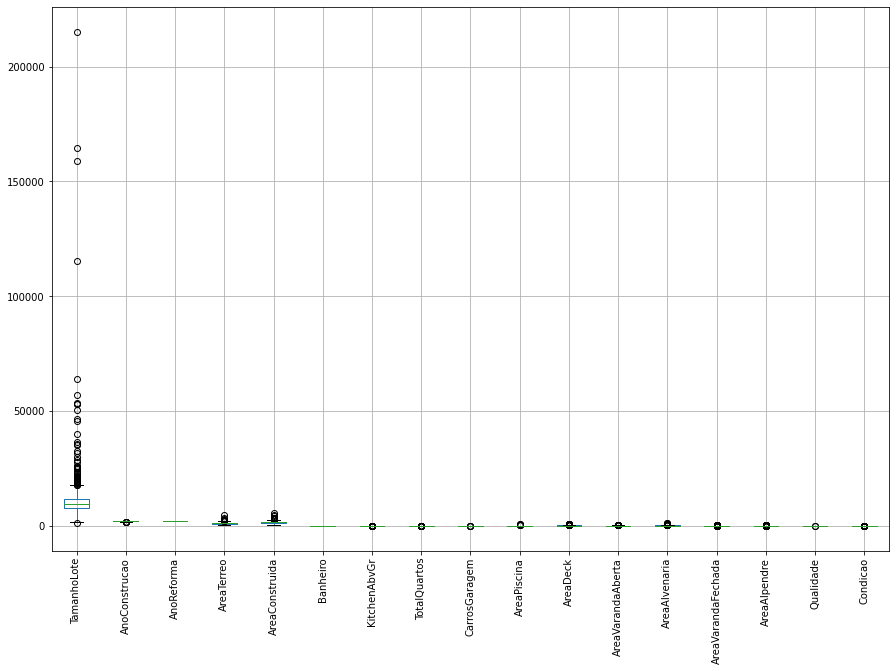

In [38]:
%%time
df_num.boxplot(figsize=(15,10));
plt.xticks(rotation=90)

### 4.3.2 Considerações

Os atributos TamanhoLote e PrecoVenda apresentam bastante variação, e também apresentam outliers. Por esses casos, vou utilizar o StandartScaler para a normalização.

## 4.4 Criando a Pipeline para a transformação dos dados

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### 4.4.1 Pipeline para dados numéricos

In [40]:
num_atributos = list(df_num)
cat_atributos = list(df_cat)

In [41]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('normalizacao', StandardScaler())
])

In [42]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('normalizacaoCat', OneHotEncoder())
])

### 4.4.2 Tratamento para dados numéricos e categoricos

In [43]:
%%time
pipeline_completo = ColumnTransformer([
    ('dropcolunas', 'drop', ['Beco','QualidadeCerca']),
    ('numerico', num_pipeline, num_atributos),
    ('categorico', cat_pipeline, cat_atributos)
])

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 17.4 µs


### 4.4.3 Dados transformados para algoritmos de IA

In [44]:
df_preparado = pipeline_completo.fit_transform(df_treino)

In [45]:
df_preparado

<1168x147 sparse matrix of type '<class 'numpy.float64'>'
	with 45552 stored elements in Compressed Sparse Row format>

# 5 Explorar modelos diferentes e selecionar os melhores.

Para a validação dos modelos, vou utilizar a validação cruzada.

In [46]:
from sklearn.model_selection import cross_val_score

## 5.1 Regressão Linear

### 5.1.1 Executando o treinamento e testando resultados

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
lin_reg = LinearRegression()

In [49]:
lin_reg.fit(df_preparado, df_treino_limpo['PrecoVenda'])

LinearRegression()

Testando:

In [50]:
dados_teste = df_treino_limpo.iloc[:5]
labels_teste = df_treino_limpo['PrecoVenda'].iloc[:5]
dados_teste_preparados = pipeline_completo.transform(dados_teste)

In [51]:
print(f'Predições: {lin_reg.predict(dados_teste_preparados)}')

Predições: [140075.30042624 180028.26844287  73761.73035357 148451.77437245
 132870.11866938]


In [52]:
print(f'Rótulos: {list(labels_teste)}')

Rótulos: [145000, 178000, 85000, 175000, 127000]


### 5.1.3 Predições

In [53]:
lin_reg_predicoes = lin_reg.predict(df_preparado)

### 5.1.2 MSE e RMSE

#### 5.1.3.1 Calculando RMSE através da validação cruzada

In [54]:
%%time
#lin_reg_mse = mean_squared_error(df_treino_limpo['PrecoVenda'], lin_reg_predicoes)
scores = cross_val_score(lin_reg, df_preparado, df_treino_limpo['PrecoVenda'], scoring='neg_mean_squared_error', cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)

CPU times: user 1.02 s, sys: 5.31 ms, total: 1.03 s
Wall time: 1.07 s


In [55]:
lin_reg_rmse_scores

array([21489.97285227, 36510.98597229, 27080.03802066, 46560.83202494,
       48741.19227266, 32034.10989335, 50677.75414099, 23265.15152196,
       34567.91205749, 22279.51302812])

In [56]:
def display_scores(scores):
  print(f'Scores: {scores}')
  print(f'Média: {scores.mean()}')
  print(f'Desvio padrão: {scores.std()}')

Visualizando scores

In [57]:
display_scores(lin_reg_rmse_scores)

Scores: [21489.97285227 36510.98597229 27080.03802066 46560.83202494
 48741.19227266 32034.10989335 50677.75414099 23265.15152196
 34567.91205749 22279.51302812]
Média: 34320.74617847447
Desvio padrão: 10581.501269485963


#### 5.1.3.2 R2

In [58]:
r2_score(df_treino_limpo['PrecoVenda'], lin_reg_predicoes)

0.9031495146158266

#### 5.1.3.4 Considerações

Temos um erro médio de cerca de 35 mil dólares, com desvio de mais ou menos cerca de 10600 dólares.

## 5.2 Regressão com Árvores de Decisão

### 5.2.1 Treinando o modelo

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
tree_reg = DecisionTreeRegressor()

In [61]:
%%time
tree_reg.fit(df_preparado, df_treino_limpo['PrecoVenda'])

CPU times: user 68.5 ms, sys: 0 ns, total: 68.5 ms
Wall time: 67.9 ms


DecisionTreeRegressor()

In [62]:
tree_reg_predicoes = tree_reg.predict(df_preparado)

### 5.2.2 Avaliando o modelo criado com árvores de decisão


RMSE:

In [63]:
%%time
#tree_reg_mse = mean_squared_error(df_treino_limpo['PrecoVenda'], tree_reg_predicoes)
scores = cross_val_score(tree_reg, df_preparado, df_treino_limpo['PrecoVenda'], scoring='neg_mean_squared_error', cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

CPU times: user 592 ms, sys: 8.48 ms, total: 601 ms
Wall time: 627 ms


In [64]:
tree_reg_rmse_scores

array([43059.07555488, 37600.97644509, 41413.39170749, 56085.42063217,
       72236.52495593, 47551.97167284, 38478.33791722, 39883.39475742,
       43450.56501617, 35126.65573641])

Visualizando scores

In [65]:
display_scores(tree_reg_rmse_scores)

Scores: [43059.07555488 37600.97644509 41413.39170749 56085.42063217
 72236.52495593 47551.97167284 38478.33791722 39883.39475742
 43450.56501617 35126.65573641]
Média: 45488.63143956114
Desvio padrão: 10530.012784454164


### 5.2.3 R2

In [66]:
r2_score(df_treino_limpo['PrecoVenda'], tree_reg_predicoes)

0.9999932614137819

### 5.2.4 Considerações

A regressão com árvore de decisão trouxe um erro médio de 46 mil dólares, com desvio de mais ou menos cerca de 11 mil dólares.

## 5.3 Floresta aleatória

### 5.3.1 Treinando o modelo

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rand_for_reg = RandomForestRegressor()

In [69]:
%%time
rand_for_reg.fit(df_preparado, df_treino_limpo['PrecoVenda'])

CPU times: user 4.25 s, sys: 8.77 ms, total: 4.26 s
Wall time: 4.26 s


RandomForestRegressor()

### 5.3.2 Avaliando o modelo criado

RMSE:

In [70]:
%%time
scores = cross_val_score(rand_for_reg, df_preparado, df_treino_limpo['PrecoVenda'], scoring='neg_mean_squared_error', cv = 10)
rand_for_reg_rmse_scores = np.sqrt(-scores)

CPU times: user 38.1 s, sys: 72.7 ms, total: 38.2 s
Wall time: 39.6 s


In [71]:
rand_for_reg_rmse_scores

array([24077.82200899, 39468.95376971, 26402.88701342, 45722.54897954,
       44740.89113899, 34105.82635606, 29145.49236383, 25502.59732334,
       25883.22743507, 24539.54630037])

Visualizando scores

In [72]:
display_scores(rand_for_reg_rmse_scores)

Scores: [24077.82200899 39468.95376971 26402.88701342 45722.54897954
 44740.89113899 34105.82635606 29145.49236383 25502.59732334
 25883.22743507 24539.54630037]
Média: 31958.979268933163
Desvio padrão: 8052.129624343973


### 5.3.3 Considerações

A regressão com floresta aleatória trouxe um erro médio de 32 mil dólares, com desvio de mais ou menos cerca de 9 mil dólares.

### 5.3.4 R2

In [73]:
rand_for_reg_predicoes = rand_for_reg.predict(df_preparado)
r2_score(df_treino_limpo['PrecoVenda'], rand_for_reg_predicoes)

0.9733006617422408

## 5.4 Regressão SVM

### 5.4.1 Treinando o modelo

In [74]:
from sklearn.svm import LinearSVR

In [75]:
svm_reg = LinearSVR(epsilon=1.5)

In [76]:
%%time
svm_reg.fit(df_preparado, df_treino_limpo['PrecoVenda'])

CPU times: user 2.9 ms, sys: 18 µs, total: 2.92 ms
Wall time: 3.07 ms


LinearSVR(epsilon=1.5)

### 5.4.2 Avaliando o modelo criado

RMSE:

In [77]:
%%time
scores = cross_val_score(svm_reg, df_preparado, df_treino_limpo['PrecoVenda'], scoring='neg_mean_squared_error', cv = 10)
svm_reg_rmse_scores = np.sqrt(-scores)

CPU times: user 24.5 ms, sys: 977 µs, total: 25.5 ms
Wall time: 27 ms


In [78]:
svm_reg_rmse_scores

array([174283.4989447 , 196309.74816032, 188868.25167455, 183056.78197653,
       177532.34246615, 186571.34804599, 175885.79831793, 179227.50432295,
       174355.07214005, 185134.19325456])

Visualizando scores

In [79]:
display_scores(svm_reg_rmse_scores)

Scores: [174283.4989447  196309.74816032 188868.25167455 183056.78197653
 177532.34246615 186571.34804599 175885.79831793 179227.50432295
 174355.07214005 185134.19325456]
Média: 182122.4539303719
Desvio padrão: 6831.167331684832


### 5.4.3 Considerações

Erro médio muito alto, cerca de 180 mil dólares.

### 5.4.4 R2

In [80]:
svm_reg_predicoes = svm_reg.predict(df_preparado)
r2_score(df_treino_limpo['PrecoVenda'], svm_reg_predicoes)

-4.467452059335142

## 5.5 Regressão XGBoost

### 5.5.1 Treinando o modelo

In [81]:
import xgboost as xgb

In [82]:
xgbr_reg = xgb.XGBRegressor(verbosity=0, random_state=42)

In [83]:
%%time
xgbr_reg.fit(df_preparado, df_treino_limpo['PrecoVenda'])

CPU times: user 260 ms, sys: 598 ms, total: 859 ms
Wall time: 1.16 s


XGBRegressor(random_state=42, verbosity=0)

### 5.5.2 Avaliando o modelo criado

RMSE:

In [84]:
%%time
scores = cross_val_score(xgbr_reg, df_preparado, df_treino_limpo['PrecoVenda'], scoring='neg_mean_squared_error', cv = 10)
xgbr_reg_rmse_scores = np.sqrt(-scores)

CPU times: user 1.39 s, sys: 10.7 ms, total: 1.4 s
Wall time: 1.39 s


In [85]:
xgbr_reg_rmse_scores

array([22106.75723705, 42861.4801229 , 24207.21164429, 42654.17631284,
       30956.55227241, 32229.36137858, 29483.40634376, 29031.26760902,
       22530.57641017, 23917.7873171 ])

Visualizando scores

In [86]:
display_scores(xgbr_reg_rmse_scores)

Scores: [22106.75723705 42861.4801229  24207.21164429 42654.17631284
 30956.55227241 32229.36137858 29483.40634376 29031.26760902
 22530.57641017 23917.7873171 ]
Média: 29997.857664812902
Desvio padrão: 7219.982252074465


### 5.5.3 Considerações

Erro médio de cerca de 29 mil dólares, com desvio de mais ou menos cerca de 7 mil dólares.

### 5.5.4 R2

In [87]:
xgbr_reg_predicoes = xgbr_reg.predict(df_preparado)
r2_score(df_treino_limpo['PrecoVenda'], xgbr_reg_predicoes)

0.9490276991392669

## 5.6 Regressão LightGBM

### 5.6.1 Treinando o modelo

In [88]:
import lightgbm as lgb

In [89]:
lgb_reg = lgb.LGBMRegressor(random_state=42)

In [90]:
%%time
lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_reg.fit(df_preparado, df_treino_limpo['PrecoVenda'])

CPU times: user 152 ms, sys: 8.03 ms, total: 160 ms
Wall time: 173 ms


LGBMRegressor(random_state=42)

### 5.6.2 Avaliando o modelo criado

RMSE:

In [91]:
%%time
scores = cross_val_score(lgb_reg, df_preparado, df_treino_limpo['PrecoVenda'], scoring='neg_mean_squared_error', cv = 10)
lgb_reg_rmse_scores = np.sqrt(-scores)

CPU times: user 1.47 s, sys: 50.1 ms, total: 1.52 s
Wall time: 1.51 s


In [92]:
lgb_reg_rmse_scores

array([24800.36662035, 37462.33908867, 26710.01963056, 43139.51342443,
       35341.39404881, 34741.12362278, 29792.0657929 , 25678.6293055 ,
       23540.41153483, 23674.62109423])

Visualizando scores

In [93]:
display_scores(lgb_reg_rmse_scores)

Scores: [24800.36662035 37462.33908867 26710.01963056 43139.51342443
 35341.39404881 34741.12362278 29792.0657929  25678.6293055
 23540.41153483 23674.62109423]
Média: 30488.048416306505
Desvio padrão: 6444.179463660255


### 5.6.3 Considerações

Erro médio de cerca de 30 mil dólares, com desvio de mais ou menos cerca de 6500 dólares.

### 5.6.4 R2

In [94]:
lgb_reg_predicoes = lgb_reg.predict(df_preparado)
r2_score(df_treino_limpo['PrecoVenda'], lgb_reg_predicoes)

0.9715749259318163

## 5.7 Analisando os resultados dos modelos

### 5.7.1 Tabela com os resultados dos modelos bases

Modelo | Erro médio | Desvio padrão | R2
--------- | ------ | -------| --------
Regressão Linear | 34320,74 | 10581,50 | 0.90
Árvores | 47167,49 | 13018,18 | 0.99
Floresta aleatória | 31644,41 | 8487,58 | 0.97
Regressão SVM |182122,45 |6831,16|-4,46
Regressão XGBoost | 29997,85 | 7219,98 | 0.94
Regressão LightGBM | 30488,04 | 6444,17 | 0.97

# 6 Aperfeiçoar os modelos e os combinar em uma solução ideal.

## 6.1 Melhores modelos

Como visto na seção 5.7.1, considero os melhores modelos aqueles que tem a menor média de erros na validação cruzada. No casso, foram: Regressão XGBoost, Regressão LightGBM e Floresta aleatória.

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

### 6.2.1 Aplicando Randomized Search para buscar os melhores hiperparâmetros

#### 6.2.1.1 Regressão XGBoost

In [96]:
param_grid = {
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat(),
    'n_estimators' : sp_randInt(100, 1000),
    'max_depth'    : sp_randInt(4, 10)
  }

In [100]:
%%time
randm_src = RandomizedSearchCV(estimator=xgbr_reg,
                               param_distributions = param_grid,
                               cv = 5,
                               n_iter = 1000,
                               n_jobs=-1,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)

CPU times: user 28 µs, sys: 1 µs, total: 29 µs
Wall time: 36.2 µs


Obs: 

A busca pelos melhores parâmetros demorou cerca de 1 hora e meia. Os melhores parâmetros estão listados no tópico 6.1.2.4. A busca está comentada devido à demora.

In [101]:
%%time
#randm_src.fit(df_preparado, df_treino_limpo['PrecoVenda'])

CPU times: user 33.2 s, sys: 4.17 s, total: 37.4 s
Wall time: 1h 32min 3s


RandomizedSearchCV(cv=5, estimator=XGBRegressor(random_state=42, verbosity=0),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd0c60fbd60>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd0c6106fa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd0c6106160>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd0c60fb670>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [102]:
#randm_src.best_params_

{'learning_rate': 0.07235035884651686,
 'max_depth': 4,
 'n_estimators': 425,
 'subsample': 0.48719865163169207}

In [103]:
''' learning_rate_xgb = randm_src.best_params_['learning_rate']
max_depth_xgb = randm_src.best_params_['max_depth']
n_estimators_xgb = randm_src.best_params_['n_estimators']
subsample_xgb = randm_src.best_params_['subsample'] '''

#### 6.1.1.2 Resultado do modelo base

In [104]:
display_scores(xgbr_reg_rmse_scores)

Scores: [22106.75723705 42861.4801229  24207.21164429 42654.17631284
 30956.55227241 32229.36137858 29483.40634376 29031.26760902
 22530.57641017 23917.7873171 ]
Média: 29997.857664812902
Desvio padrão: 7219.982252074465


#### 6.1.2.3 Resultado do modelo aperfeiçoado

In [105]:
''' xgbr_reg2 = xgb.XGBRegressor(verbosity=0, random_state=42, learning_rate= learning_rate_xgb,
                             max_depth = max_depth_xgb, n_estimators= n_estimators_xgb, subsample= subsample_xgb) '''

In [106]:
%%time
#xgbr_reg2.fit(df_preparado, df_treino_limpo['PrecoVenda'])

CPU times: user 978 ms, sys: 5.2 ms, total: 984 ms
Wall time: 982 ms


XGBRegressor(learning_rate=0.07235035884651686, max_depth=4, n_estimators=425,
             random_state=42, subsample=0.48719865163169207, verbosity=0)

In [107]:
%%time
#scores = cross_val_score(xgbr_reg2, df_preparado, df_treino_limpo['PrecoVenda'], scoring='neg_mean_squared_error', cv = 10)
#xgbr_reg2_rmse_scores = np.sqrt(-scores)

CPU times: user 8.24 s, sys: 44 ms, total: 8.29 s
Wall time: 8.26 s


In [108]:
#display_scores(xgbr_reg2_rmse_scores)

Scores: [23852.19951571 37961.23253501 26257.8800701  48480.87110687
 26857.53484397 31895.27184897 27899.20788005 30063.52225655
 20880.55109999 22258.13434529]
Média: 29640.640550250286
Desvio padrão: 7851.22078323241


#### 6.1.2.4 Considerações

Com o RandomizedSearchCV, obtemos a melhor solução com os hiperparâmetros `learning_rate` = 0.07235035884651686, `max_depth` = 4, `n_estimators` = 425 e `subsample` = 0.48719865163169207.